In [ ]:
# Introduction to Decision trees and Random Forest - Titanic dataset

## Decision tree hyperparameters

* ***max_depth***: Specifies the maximum depth of the tree. It limits the number of levels or nodes in the tree.
* ***min_samples_split***: Defines the minimum number of samples required to split an internal node. It prevents further splitting of nodes if the number of samples is below this threshold.
* ***min_samples_leaf***: Specifies the minimum number of samples required to be at a leaf node. It controls the minimum size of leaf nodes in the tree.
* ***cost-complexity***: This parameter ccp_alpha controls the trade-off between tree complexity and accuracy. A higher value of alpha encourages simpler trees with fewer nodes, while a lower value allows more complex trees that may overfit the training data. By optimizing alpha, you can find the optimal balance between model complexity and performance.
* ***max_features***: Determines the maximum number of features to consider when looking for the best split. It can be a fixed number or a fraction of the total number of features.
* ***criterion***: Specifies the criterion used for splitting nodes. Common options are "gini" for the Gini impurity and "entropy" for information gain.
* ***class_weight***: Assigns weights to different classes to handle class imbalance. It can be set to "balanced" to automatically adjust the weights inversely proportional to class frequencies.

## Tips to practical use: 
see [Scikit-learn - decisionTrees - tips-on-practical-use](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning])

1. Consider the relevance of the variables to the model. You can make feature engineering, use PCA or dimentional reduction. Decision trees tend to overfit with a large number of features. The ration between the number of features and the number of samples must be consistent. 
2. Decision trees are sensible to biased unbalanced datasets. Check it before fitting and provide the balancing process if necessary.
3. The number of samples and featues has to be aligned with the max_depth, and the min_sample_leaf (or min_samples_split). beguin with max_path = 3, min_samples_leaf = 5. A decision made with a small number of samples can lead to overfiting and limit the tree grothw with a high min_samples_leaf will prevent the tree from learning. Check the tree representation to see if the decisions are reasonabe consiering the number of samples and the node path.
4. All decision trees use np.float32 arrays internally. If training data is not in this format, a copy of the dataset will be made.
5. The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. 

# Random Forest

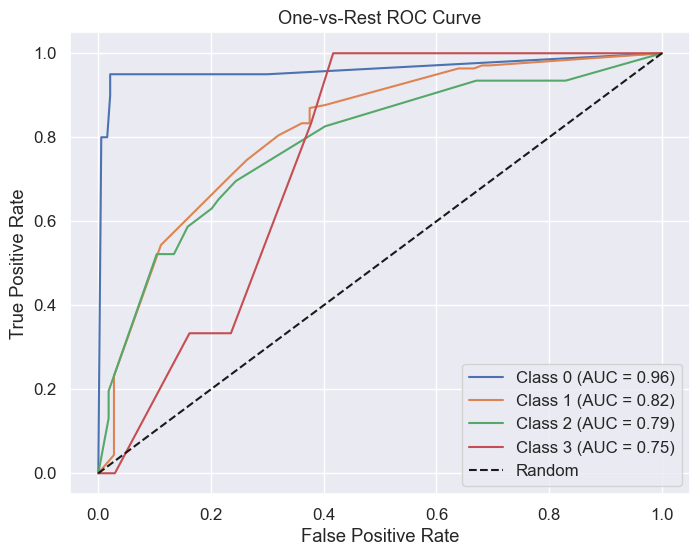

In [142]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for each class
Y_pred_proba = modeltree.predict_proba(X_val)

# Plot the One-vs-Rest ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(modeltree.classes_)):
    fpr, tpr, thresholds = roc_curve(Y_val == i, Y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Class %d (AUC = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [143]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each class
y_probs = modeltree.predict_proba(X_val)

# Initialize empty lists for optimal thresholds
optimal_thresholds = []

# Iterate over each class
for i in range(len(modeltree.classes_)):
    fpr, tpr, thresholds = roc_curve(Y_val == i, Y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    
    # Find the threshold that maximizes the Youden's J statistic or other criteria
    optimal_threshold_index = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_threshold_index]
    
    # Append the optimal threshold to the list
    optimal_thresholds.append(optimal_threshold)
    
    # Print the AUC and optimal threshold for the class
    print("Class:", modeltree.classes_[i])
    print("AUC:", roc_auc)
    print("Optimal Threshold:", optimal_threshold)
    print()


Class: 0.0
AUC: 0.9624999999999999
Optimal Threshold: 0.5

Class: 1.0
AUC: 0.8166264090177134
Optimal Threshold: 0.45454545454545453

Class: 2.0
AUC: 0.7857900318133617
Optimal Threshold: 0.2857142857142857

Class: 3.0
AUC: 0.7487745098039216
Optimal Threshold: 0.03571428571428571



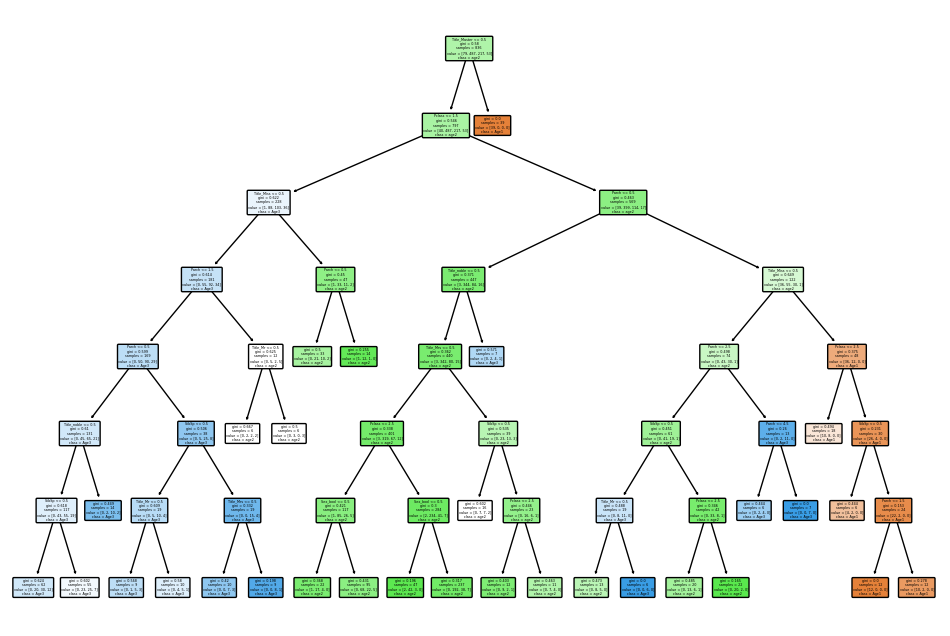

In [108]:

# Generate the decision tree plot
fig, ax = plt.subplots(figsize=(12, 8))
tree_plot = tree.plot_tree(modeltree, feature_names=features, class_names=['Age1', 'age2', 'Age3', 'Age4'], filled=True, rounded=True, ax=ax)
# Display the plot
plt.show()

In [291]:
modeltree.feature_importances_
modeltree.get_params(deep=True)
modeltree.tree_.feature[1]

0

In [225]:
from sklearn.ensemble import RandomForestClassifier

# y = train_data["Survived"]

# features = ["Pclass", "Sex", "SibSp", "Parch"]
# X = pd.get_dummies(train_data[features])
# X_test = pd.get_dummies(test_data[features])

modelRF = RandomForestClassifier(n_estimators=3, max_depth=3, random_state=1)
modelRF.fit(X_train, Y_train)
Y_pred1 = modelRF.predict(X_test)

output = pd.DataFrame({'PassengerId':  df.loc[~train_idx, 'PassengerId'], 'Survived': Y_pred})
output.to_csv('RF_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [226]:
# Calculate the accuracy of the prediction.
# acc = model.score(X_test, Y_truth)# We calculate accuracy with the fold validation data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_truth, Y_pred1)

print("Accuracy:", accuracy)

Accuracy: 0.7822966507177034


In [237]:
# Plot the decision tree
fig, ax = plt.subplots(figsize=(12, 12),zoomable=True)
tree.plot_tree(modeltree, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True, rounded = True)
plt.show()

AttributeError: Figure.set() got an unexpected keyword argument 'zoomable'

Although the survivor is small, the imbalance is not large enough for over/under sampling. If you want to know more about over/under sampling, please refer to the notebook below.

We can see in the above visuaizations that the dataset needs some treatment before modeling.

1. Age is an important variable but there are some instances with Na values.
2. Sex is a very important variable and needs to be coverted to cathecorical and maped to numerical 0 or 1.
3. Random variables like 'name', 'passengerId', ticket and Embarked should not contribute to the prediction of survival ability.
4. Cabine is a ver important variable but there some missing values and the tthe values are coded so we need to decode them and attribute meaningfull label values.


# Cabin missing data

In [129]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [130]:
# Create the feature Has cabin
df['Has_Cabin'] = df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

<Axes: xlabel='Has_Cabin', ylabel='count'>

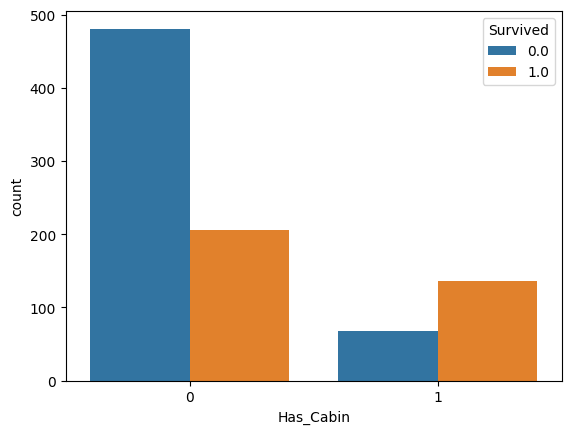

In [131]:
sns.countplot(x='Has_Cabin', hue='Survived', data=df[train_idx])

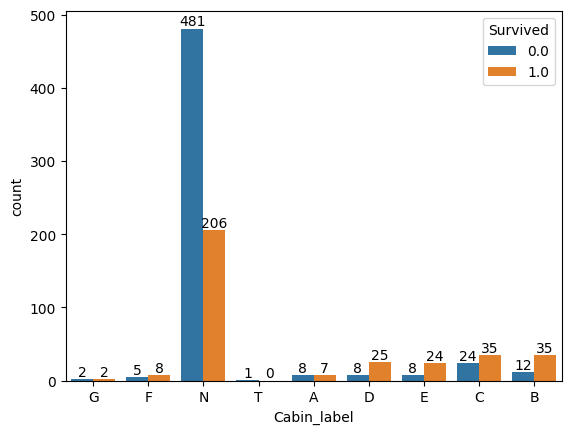

In [144]:
df['Cabin'] = df['Cabin'].fillna('N')
df['Cabin_label'] = df['Cabin'].str.get(0)


# Create the countplot
ax = sns.countplot(x='Cabin_label', hue='Survived', data=df[train_idx], order=sorted_cabin_labels)

# Add annotations to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')

# Display the plot
plt.show()

We can see that the missing cabin label N represents a big portion of the statistics of deaths and survivals when compared to other cabine labels. Let us try to estimate the cabin label using other info like farefro example.

In [142]:
cabine_fare = df.groupby('Cabin_label')['Fare'].mean().sort_values()
sorted_cabin_labels = cabine_fare.index


Index(['G', 'F', 'N', 'T', 'A', 'D', 'E', 'C', 'B'], dtype='object', name='Cabin_label')

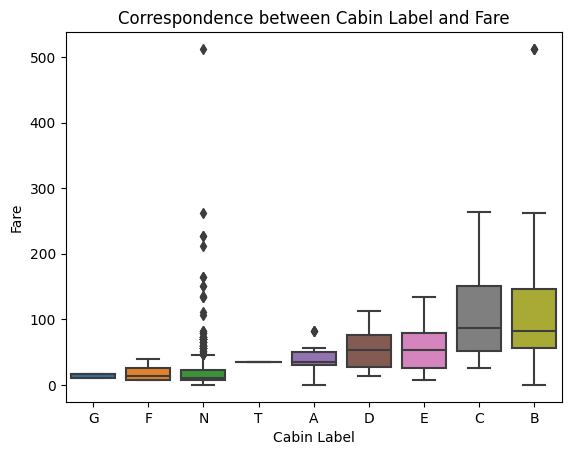

In [143]:
# Calculate the mean fare for each cabin label
cabine_fare = df.groupby('Cabin_label')['Fare'].mean().sort_values()
sorted_cabin_labels = cabine_fare.index

# Create the box plot with sorted labels
sns.boxplot(x='Cabin_label', y='Fare', data=df, order=sorted_cabin_labels)

# Add labels and title
plt.xlabel('Cabin Label')
plt.ylabel('Fare')
plt.title('Correspondence between Cabin Label and Fare')

# Display the plot
plt.show()









In [151]:
from scipy.stats import chi2_contingency

# investivate the rows with known cabine labels
subdf = df.loc[df['Cabin_label'] != 'N',:]
# Create a contingency table
contingency_table = pd.crosstab(subdf['Embarked'], subdf['Cabin_label'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the chi-square test statistic and p-value
print("Chi-square test statistic:", chi2)
print("P-value:", p_value)

Chi-square test statistic: 21.585484133916033
P-value: 0.08754236421390581


The chi-square test statistic of 21.585484133916033 and the p-value of 0.08754236421390581 suggest some evidence of an association between the variables being tested, but the association is not statistically significant at a conventional significance level of 0.05.

In [146]:
# Find duplicate rows based on 'Ticket' column
duplicate_rows = df[df.duplicated('Cabin', keep=False)]

# Display the duplicate rows
print(duplicate_rows)


      PassengerId  Survived  Pclass   
0               1       0.0       3  \
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1303         1304       NaN       3   
1304         1305       NaN       3   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp   
0                               Braund, Mr. Owen Harris    male  22.0      1  \
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

In [64]:
dataset_list = [train, test]

# map Sex
for dataset in dataset_list:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)


# Create new features

# Feature that tells whether a passenger had a cabin or not
# This feature can be tendetious because maybe the missing Cabin is due to 
for dataset in dataset_list:
    dataset['Has_Cabin'] = dataset['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
 

train.head()

# # Create new feature FamilySize as a combination of SibSp and Parch
# for dataset in full_data:
#     dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# # Create new feature IsAlone from FamilySize
# for dataset in full_data:
#     dataset['IsAlone'] = 0
#     dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
# # Remove all NULLS in the Embarked column
# for dataset in full_data:
#     dataset['Embarked'] = dataset['Embarked'].fillna('S')
# # Remove all NULLS in the Fare column
# for dataset in full_data:
#     dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

# # Remove all NULLS in the Age column
# for dataset in full_data:
#     age_avg = dataset['Age'].mean()
#     age_std = dataset['Age'].std()
#     age_null_count = dataset['Age'].isnull().sum()
#     age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
#     # Next line has been improved to avoid warning
#     dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
#     dataset['Age'] = dataset['Age'].astype(int)

# # Define function to extract titles from passenger names
# def get_title(name):
#     title_search = re.search(' ([A-Za-z]+)\.', name)
#     # If the title exists, extract and return it.
#     if title_search:
#         return title_search.group(1)
#     return ""

# for dataset in full_data:
#     dataset['Title'] = dataset['Name'].apply(get_title)
# # Group all non-common titles into one single grouping "Rare"
# for dataset in full_data:
#     dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

#     dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
#     dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
#     dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

# for dataset in full_data:
#     # Mapping Sex
#     dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
#     # Mapping titles
#     title_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Rare": 5}
#     dataset['Title'] = dataset['Title'].map(title_mapping)
#     dataset['Title'] = dataset['Title'].fillna(0)

#     # Mapping Embarked
#     dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
#     # Mapping Fare
#     dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
#     dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
#     dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
#     dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
#     dataset['Fare'] = dataset['Fare'].astype(int)
    
#     # Mapping Age
#     dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
#     dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
#     dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
#     dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
#     dataset.loc[ dataset['Age'] > 64, 'Age'] ;

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1


In [58]:
train.Has_Cabin.value_counts()

Has_Cabin
0    687
1    204
Name: count, dtype: int64

We can see in the above visuaizations that the dataset needs some treatment before modeling.

1. Age is an important variable but there are some instances with Na values.
2. Sex is a very important variable and needs to be coverted to cathecorical and maped to numerical 0 or 1.
3. Random variables like 'name', 'passengerId', ticket and Embarked should not contribute to the prediction of survival ability.
4. Cabine is a ver important variable but there some missing values and the tthe values are coded so we need to decode them and attribute meaningfull label values.


In [21]:
# Check the correlation between the variables of the dataset
corrMatrix = train_data['Sex'].corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)


ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

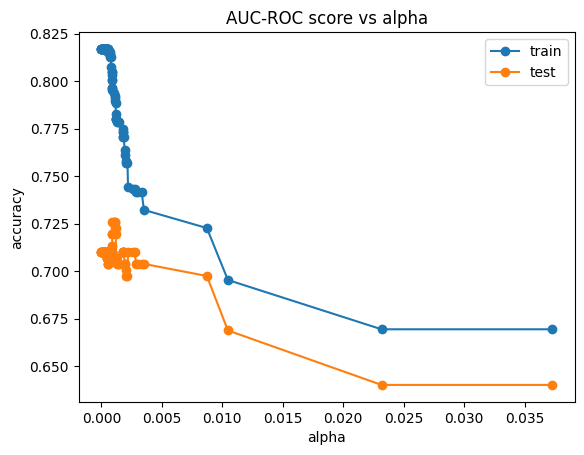

In [190]:
from sklearn.metrics import roc_auc_score

# Allow a decision tree to grow to its full depth
clf = tree.DecisionTreeClassifier(random_state=22)
clf.fit(X_train, Y_train)

# compute ccp_alpha values
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas = ccp_alphas[:-1]  # the last one corresponds to a tree with one node only.

# train DT classifier for each ccp_alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)

train_scores = [accuracy_score(Y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [accuracy_score(Y_val, clf.predict(X_val)) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("AUC-ROC score vs alpha")
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.show()